In [272]:
#importing libraries for data manupilation,data visualisation,etc..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [273]:
#importing csv file
df=pd.read_csv("dataframe_.csv")

In [274]:
#displaying  first five rows
df.head()

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [276]:
df.describe()

,input,output
count,1696.00,1696.00
mean,1.16,-34.09
std,79.01,65.77
min,-134.96,-132.42
25%,-63.39,-80.03
50%,10.20,-50.47
75%,70.26,-11.00
max,134.61,134.43


In [277]:
#length of the dataset
df.shape

(1697, 2)

In [278]:
#Data Cleaning
#checking for null values
df.isnull().sum()

input     1
output    1
dtype: int64

There is 1 null value in each column.

In [279]:
# Null value treatment
mean=df["input"].mean()
df["input"].fillna(mean,inplace=True)

In [280]:
mean1=df["output"].mean()
df["output"].fillna(mean1,inplace=True)

In [281]:
df.isnull().sum()

input     0
output    0
dtype: int64

Now dataset is having no null values.

In [282]:
#finding the correlation
df.corr()

,input,output
input,1.00,0.51
output,0.51,1.00


<AxesSubplot:xlabel='input'>

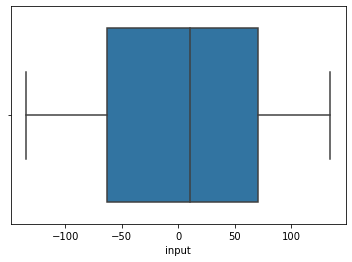

In [283]:
#checking for the outliers
sns.boxplot(df["input"])

<AxesSubplot:xlabel='output'>

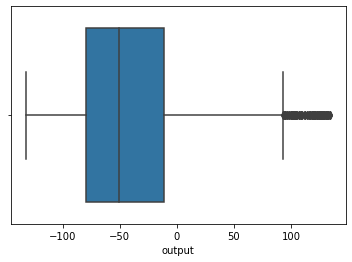

In [284]:
sns.boxplot(df["output"])

The target variable (Output) is having outliers.

In [285]:
#Detecting outliers
q1=np.percentile(df["output"],25,interpolation='midpoint')
 
q3=np.percentile(df["output"],75,interpolation='midpoint')
IQR=q3-q1

In [286]:
upper=np.where(df["output"]>=(q3+1.5*IQR))
lower=np.where(df["output"]<=(q1-1.5*IQR))
print(len(upper[0]))
print(len(lower[0]))

144
0


There are 144 outliers present in target variable.

In [287]:
#Outlier treatment
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

In [288]:
df.shape

(1553, 2)

Before removing outliers the dataset contains 1697 rows,Now after removing outliers the dataset contains 1553 rows or elements.

In [289]:
#Feature Engineering

In [290]:
x=df["input"]
y=df["output"]

<AxesSubplot:xlabel='input', ylabel='output'>

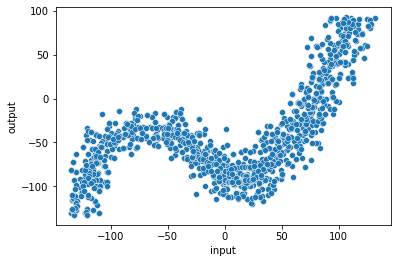

In [291]:
sns.scatterplot(x,y)

<AxesSubplot:xlabel='input', ylabel='output'>

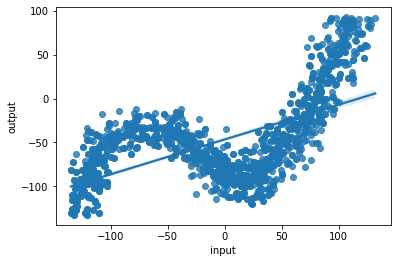

In [292]:
sns.regplot(x,y)

From the above plot we can conclude that it is underfitted.
To avoid these:
1-Increase the features of dataset
2-Remove noisy data

In [293]:
from sklearn.model_selection import train_test_split
x=df[["input"]]
y=df[["output"]]

In [294]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [295]:
from lazypredict.Supervised import LazyRegressor
reg=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=reg.fit(x_train,x_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:15<00:00,  2.73it/s]


In [296]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.90,0.90,15.11,0.17
XGBRegressor,0.88,0.89,16.06,0.07
RandomForestRegressor,0.88,0.88,16.47,0.25
BaggingRegressor,0.88,0.88,16.56,0.03
ExtraTreeRegressor,0.87,0.87,16.86,0.01
DecisionTreeRegressor,0.87,0.87,17.26,0.01
GradientBoostingRegressor,0.86,0.87,17.40,0.09
GaussianProcessRegressor,0.86,0.86,17.99,0.08
LGBMRegressor,0.85,0.85,18.48,0.08


From Above predictions ExtraTreeregressor is best for dataset since it has high Adjusted R-squared value than other algorithms or models.

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor

In [298]:
model=LinearRegression()
model1=ExtraTreeRegressor(random_state=0)

In [299]:
model.fit(x_train,y_train)

LinearRegression()

In [300]:
pred=model.predict(x_test)

In [301]:
#Adjusted R Squared value
1-(1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.3544118951138374

We get high variance with linear Regression,instead we can do with LWLR(Locally Weighted Linear Regression) using hyper parameter tuning.But From above lazy predict model i can conclude that Extratree regressor is good for dataset.

In [302]:
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)

In [303]:
#Adjusted R Squared value
1-(1-model1.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9765902672404465